# Bankruptcy Predicting (Transfer Learning)

In [1]:
#!pip install imblearn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Train model - using bankruptcy_train.csv

In [3]:
bankruptcy_train=pd.read_csv("bankruptcy_Train.csv")

In [4]:
bankruptcy_train.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [5]:
bankruptcy_train.shape

(10000, 65)

In [6]:
# Bloew are the formulas behind each attributes:
#Attr1	net profit / total assets
#Attr2	total liabilities / total assets
#Attr3	working capital / total assets
#Attr4	current assets / short-term liabilities
#Attr5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
#Attr6	retained earnings / total assets
#Attr7	EBIT / total assets
#Attr8	book value of equity / total liabilities
#Attr9	sales / total assets
#Attr10	equity / total assets
#Attr11	(gross profit + extraordinary items + financial expenses) / total assets
#Attr12	gross profit / short-term liabilities
#Attr13	(gross profit + depreciation) / sales
#Attr14	(gross profit + interest) / total assets
#Attr15	(total liabilities * 365) / (gross profit + depreciation)
#Attr16	(gross profit + depreciation) / total liabilities
#Attr17	total assets / total liabilities
#Attr18	gross profit / total assets
#Attr19	gross profit / sales
#Attr20	(inventory * 365) / sales
#Attr21	sales (n) / sales (n-1)
#Attr22	profit on operating activities / total assets
#Attr23	net profit / sales
#Attr24	gross profit (in 3 years) / total assets
#Attr25	(equity - share capital) / total assets
#Attr26	(net profit + depreciation) / total liabilities
#Attr27	profit on operating activities / financial expenses
#Attr28	working capital / fixed assets
#Attr29	logarithm of total assets
#Attr30	(total liabilities - cash) / sales
#Attr31	(gross profit + interest) / sales
#Attr32	(current liabilities * 365) / cost of products sold
#Attr33	operating expenses / short-term liabilities
#Attr34	operating expenses / total liabilities
#Attr35	profit on sales / total assets
#Attr36	total sales / total assets
#Attr37	(current assets - inventories) / long-term liabilities
#Attr38	constant capital / total assets
#Attr39	profit on sales / sales
#Attr40	(current assets - inventory - receivables) / short-term liabilities
#Attr41	total liabilities / ((profit on operating activities + depreciation) * (12/365))
#Attr42	profit on operating activities / sales
#Attr43	rotation receivables + inventory turnover in days
#Attr44	(receivables * 365) / sales
#Attr45	net profit / inventory
#Attr46	(current assets - inventory) / short-term liabilities
#Attr47	(inventory * 365) / cost of products sold
#Attr48	EBITDA (profit on operating activities - depreciation) / total assets
#Attr49	EBITDA (profit on operating activities - depreciation) / sales
#Attr50	current assets / total liabilities
#Attr51	short-term liabilities / total assets
#Attr52	(short-term liabilities * 365) / cost of products sold)
#Attr53	equity / fixed assets
#Attr54	constant capital / fixed assets
#Attr55	working capital
#Attr56	(sales - cost of products sold) / sales
#Attr57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
#Attr58	total costs /total sales
#Attr59	long-term liabilities / equity
#Attr60	sales / inventory
#Attr61	sales / receivables
#Attr62	(short-term liabilities *365) / sales
#Attr63	sales / short-term liabilities
#Attr64	sales / fixed assets

### Clean data

In [7]:
# Drop the columns that can not be created in "Fundamental" dataset, where we are going to aplly model.
bankruptcy_train = bankruptcy_train.drop(['Attr5','Attr11','Attr21','Attr24','Attr25','Attr27','Attr29',
                                          'Attr33','Attr34','Attr35','Attr38','Attr39','Attr43','Attr54','Attr55','Attr58'], axis=1)

In [8]:
bankruptcy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
Attr1     10000 non-null float64
Attr2     10000 non-null float64
Attr3     10000 non-null float64
Attr4     10000 non-null float64
Attr6     10000 non-null float64
Attr7     10000 non-null float64
Attr8     10000 non-null float64
Attr9     10000 non-null float64
Attr10    10000 non-null float64
Attr12    10000 non-null float64
Attr13    10000 non-null float64
Attr14    10000 non-null float64
Attr15    10000 non-null float64
Attr16    10000 non-null float64
Attr17    10000 non-null float64
Attr18    10000 non-null float64
Attr19    10000 non-null float64
Attr20    10000 non-null float64
Attr22    10000 non-null float64
Attr23    10000 non-null float64
Attr26    10000 non-null float64
Attr28    10000 non-null float64
Attr30    10000 non-null float64
Attr31    10000 non-null float64
Attr32    10000 non-null float64
Attr36    10000 non-null float64
Attr37    10000 non-null float64
A

In [9]:
# Count the occurrences of bankruptcy and no bankruptcy
occ = bankruptcy_train['class'].value_counts()
print(occ)

# Print the ratio of bankruptcy cases
print(occ / len(bankruptcy_train.index))

0    9797
1     203
Name: class, dtype: int64
0    0.9797
1    0.0203
Name: class, dtype: float64


### Data Exploratory

In [10]:
def plot_pairgrid(df):
    
    df = df[['Attr6', 'Attr9', 'Attr13', 'Attr16', 'Attr26', 'Attr46']]
    g = sns.PairGrid(df)
    g = g.map_offdiag(plt.scatter)
    ax = g.map_diag(plt.hist)
    
    return ax

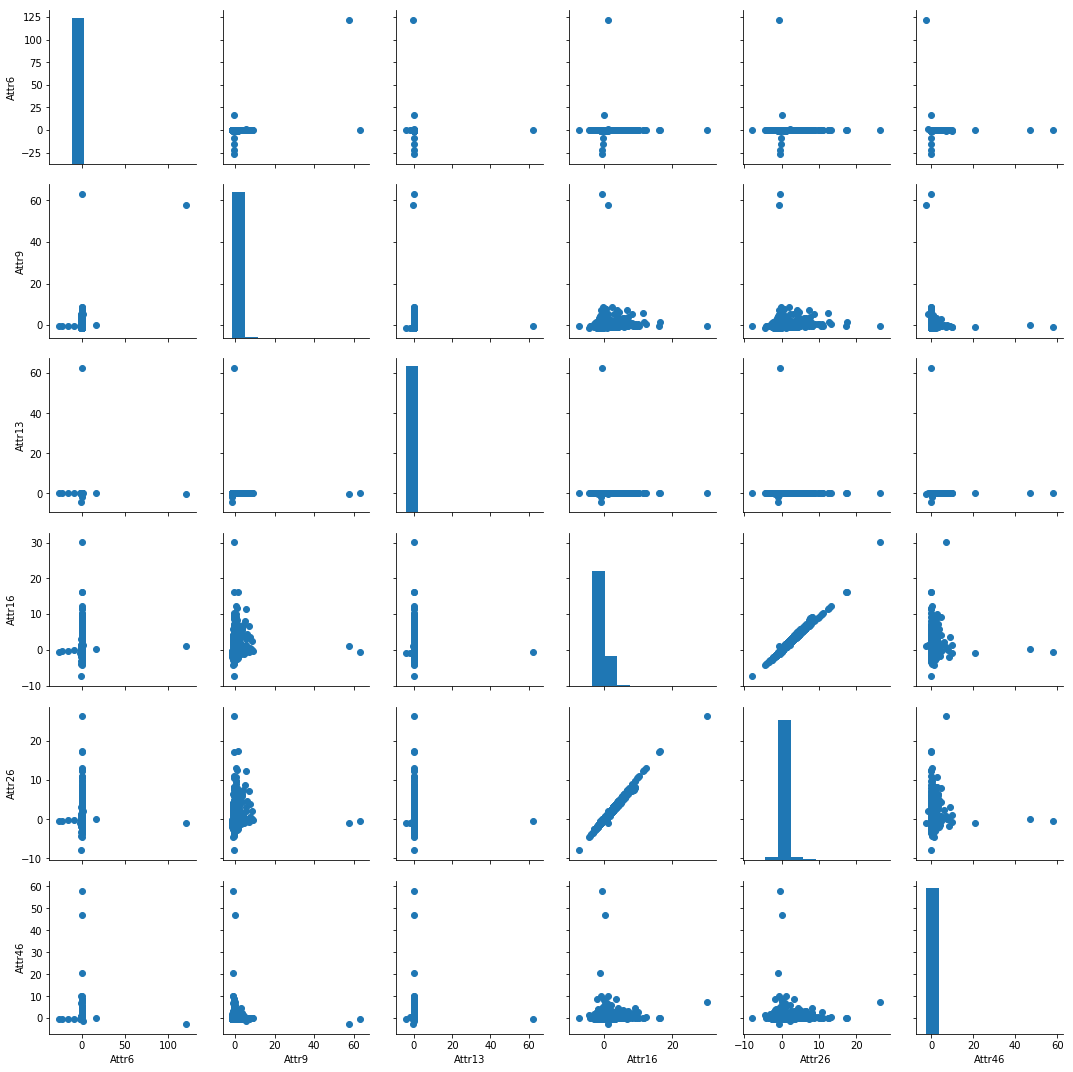

In [11]:
pg = plot_pairgrid(bankruptcy_train)

##### Although bankruptcy companies may have higher sales, however, they usually have lower profitability.

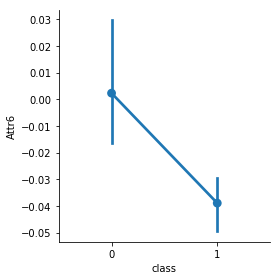

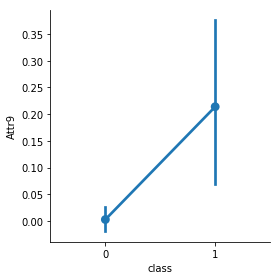

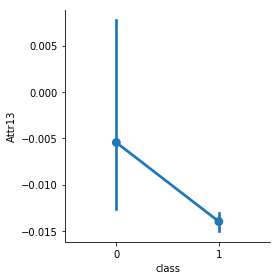

In [12]:
#Attr6	retained earnings / total assets
sns.factorplot('class','Attr6',data=bankruptcy_train,size=4)

#Attr9	sales / total assets
sns.factorplot('class','Attr9',data=bankruptcy_train,size=4)

#Attr13	(gross profit + depreciation) / sales
sns.factorplot('class','Attr13',data=bankruptcy_train,size=4)

##### Bankruptcy companies usually have lower liquidity.

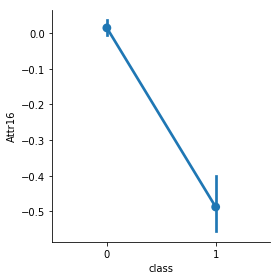

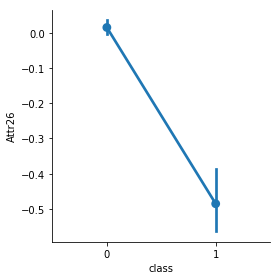

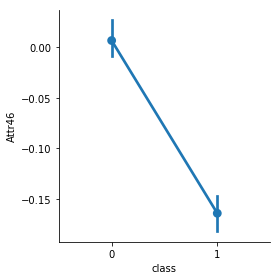

In [13]:
#Attr16	(gross profit + depreciation) / total liabilities
sns.factorplot('class','Attr16',data=bankruptcy_train,size=4)

#Attr26	(net profit + depreciation) / total liabilities
sns.factorplot('class','Attr26',data=bankruptcy_train,size=4)

#Attr46	(current assets - inventory) / short-term liabilities
sns.factorplot('class','Attr46',data=bankruptcy_train,size=4)

### SMOTE to deal with imbalance data

In [14]:
X=bankruptcy_train.iloc[:,0:48]
y=bankruptcy_train.iloc[:,48]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (10000, 48)
Shape of y: (10000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7000, 48)
Number transactions y_train dataset:  (7000,)
Number transactions X_test dataset:  (3000, 48)
Number transactions y_test dataset:  (3000,)


In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 130
Before OverSampling, counts of label '0': 6870 

After OverSampling, the shape of train_X: (13740, 48)
After OverSampling, the shape of train_y: (13740,) 

After OverSampling, counts of label '1': 6870
After OverSampling, counts of label '0': 6870


### Logistic Regression Model

In [17]:
lr = LogisticRegression()
# tuning the parameters
parameters = {'C': np.linspace(1, 10, 10)}
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   14.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [18]:
clf.best_params_

{'C': 2.0}

In [19]:
lr1 = LogisticRegression(C=2,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res)

[LibLinear]

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [20]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 86.15384615384616%


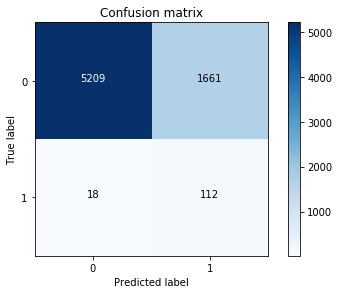

In [21]:
y_train_pre = lr1.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 83.56164383561644%


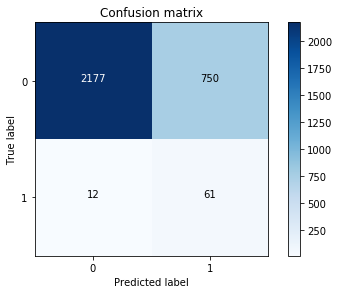

In [22]:
y_pre = lr1.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [23]:
lr_accuracy_score_smote = metrics.accuracy_score(y_test, y_pre)
print("Logistic Regression Accuracy:", lr_accuracy_score_smote)

lr_precision_score_smote = metrics.precision_score(y_test, y_pre)
print("Logistic Regression Precision:", lr_precision_score_smote)

lr_recall_score_smote = metrics.recall_score(y_test, y_pre)
print("Logistic Regression Recall:", lr_recall_score_smote)

Logistic Regression Accuracy: 0.746
Logistic Regression Precision: 0.0752157829839704
Logistic Regression Recall: 0.8356164383561644


In [24]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2927
           1       0.08      0.84      0.14        73

   micro avg       0.75      0.75      0.75      3000
   macro avg       0.53      0.79      0.49      3000
weighted avg       0.97      0.75      0.83      3000



### Decision Tree Classifier Model

In [25]:
dt = DecisionTreeClassifier()
# tuning the parameters
parameters = {'max_depth': [2,3,4,5], 'min_samples_leaf':[0.04,0.06,0.08,0.1]}
dt = GridSearchCV(dt, parameters, cv=5)
dt.fit(X_train_res, y_train_res)
dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 0.04}

In [26]:
dt1 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 0.04) 
dt1.fit(X_train_res, y_train_res)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.04, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Recall metric in the train dataset: 83.84615384615384%


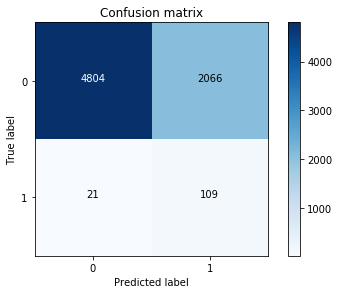

In [27]:
y_train_pre = dt1.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 71.23287671232876%


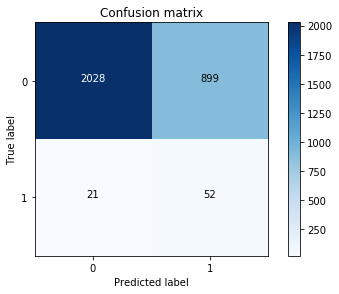

In [28]:
y_pre = dt1.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [29]:
dt_accuracy_score_smote = metrics.accuracy_score(y_test, y_pre)
print("Decision Tree Classifier Accuracy:", dt_accuracy_score_smote)

dt_precision_score_smote = metrics.precision_score(y_test, y_pre)
print("Decision Tree Classifier Precision:", dt_precision_score_smote)

dt_recall_score_smote = metrics.recall_score(y_test, y_pre)
print("Decision Tree Classifier Recall:", dt_recall_score_smote)

Decision Tree Classifier Accuracy: 0.6933333333333334
Decision Tree Classifier Precision: 0.054679284963196635
Decision Tree Classifier Recall: 0.7123287671232876


### Random Forest Classifier Model

In [30]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Recall metric in the train dataset: 100.0%


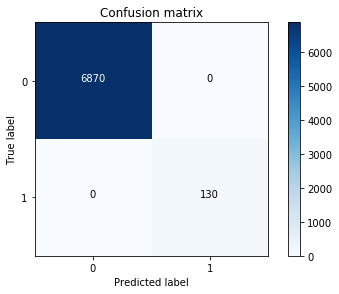

In [31]:
y_train_pre = rf.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 16.438356164383563%


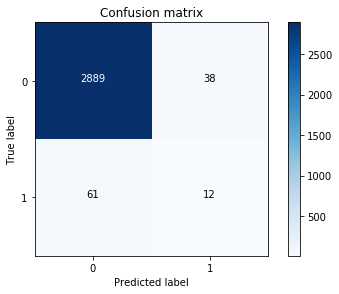

In [32]:
y_pre = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [33]:
rf_accuracy_score_smote = metrics.accuracy_score(y_test, y_pre)
print("Random Forest Classifier Accuracy:", rf_accuracy_score_smote)

rf_precision_score_smote = metrics.precision_score(y_test, y_pre)
print("Random Forest Classifier Precision:", rf_precision_score_smote)

rf_recall_score_smote = metrics.recall_score(y_test, y_pre)
print("Random Forest Classifier Recall:", rf_recall_score_smote)

Random Forest Classifier Accuracy: 0.967
Random Forest Classifier Precision: 0.24
Random Forest Classifier Recall: 0.1643835616438356


In [34]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Attr26,0.059
Attr6,0.050
Attr13,0.048
Attr16,0.045
Attr9,0.037
Attr2,0.035
Attr46,0.034
Attr15,0.025
Attr41,0.023


### Just for fun! How SMOTE technique improved the model? What if we just use the original dataset?
##### We are using the similar logic as above but with the original dataset, where SMOTE was not applied.

##### Logistic Regression Model - no smote

In [35]:
lr3 = LogisticRegression()
# tuning the parameters
parameters = {'C': np.linspace(1, 10, 10)}
clf = GridSearchCV(lr3, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [36]:
clf.best_params_

{'C': 8.0}

In [37]:
lr4 = LogisticRegression(C=8,penalty='l1', verbose=5)
lr4.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [38]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 0.7692307692307693%


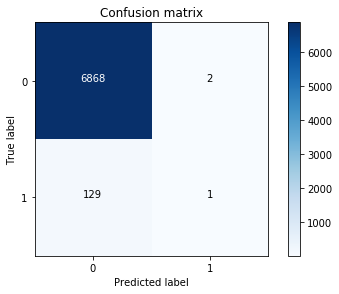

In [39]:
y_train_pre = lr4.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 0.0%


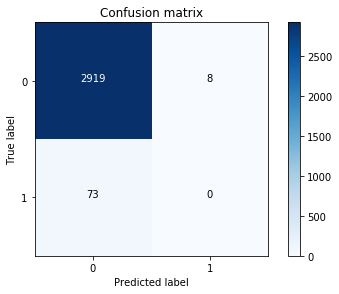

In [40]:
y_pre = lr4.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [41]:
lr_accuracy_score_nosmote = metrics.accuracy_score(y_test, y_pre)
print("Logistic Regression Accuracy (no smote):", lr_accuracy_score_nosmote)

lr_precision_score_nosmote = metrics.precision_score(y_test, y_pre)
print("Logistic Regression Precision (no smote):", lr_precision_score_nosmote)

lr_recall_score_nosmote = metrics.recall_score(y_test, y_pre)
print("Logistic Regression Recall (no smote):", lr_recall_score_nosmote)

Logistic Regression Accuracy (no smote): 0.973
Logistic Regression Precision (no smote): 0.0
Logistic Regression Recall (no smote): 0.0


##### Decision Tree Classifier Model - no smote 

In [42]:
dt3 = DecisionTreeClassifier()
# tuning the parameters
parameters = {'max_depth': [2,3,4,5], 'min_samples_leaf':[0.04,0.06,0.08,0.1]}
dt3 = GridSearchCV(dt3, parameters, cv=5)
dt3.fit(X_train, y_train)
dt3.best_params_

{'max_depth': 2, 'min_samples_leaf': 0.04}

In [43]:
dt4 = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 0.04) 
dt4.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.04, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Recall metric in the train dataset: 0.0%


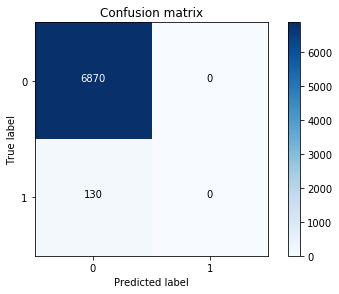

In [44]:
y_train_pre = dt4.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 0.0%


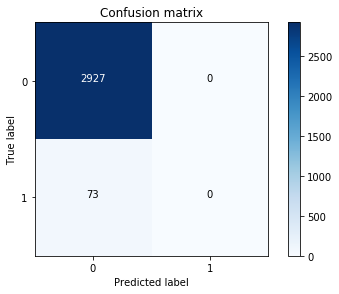

In [45]:
y_pre = dt4.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [46]:
dt_accuracy_score_nosmote = metrics.accuracy_score(y_test, y_pre)
print("Decision Tree Classifier Accuracy (no smote):", dt_accuracy_score_nosmote)

dt_precision_score_nosmote = metrics.precision_score(y_test, y_pre)
print("Decision Tree Classifier Precision (no smote):", dt_precision_score_nosmote)

dt_recall_score_nosmote = metrics.recall_score(y_test, y_pre)
print("Decision Tree Classifier Recall (no smote):", dt_recall_score_nosmote)

Decision Tree Classifier Accuracy (no smote): 0.9756666666666667
Decision Tree Classifier Precision (no smote): 0.0
Decision Tree Classifier Recall (no smote): 0.0


##### Random Forest Classifier Model - no smote

In [47]:
rf2 = RandomForestClassifier(n_estimators=500)
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Recall metric in the train dataset: 100.0%


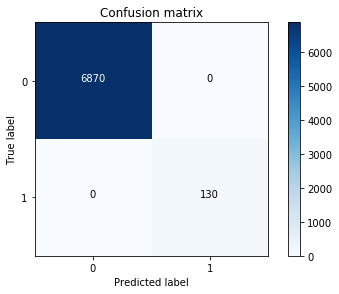

In [48]:
y_train_pre = rf2.predict(X_train)
cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 1.36986301369863%


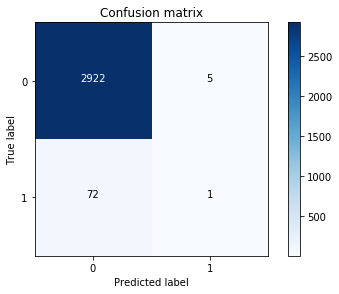

In [49]:
y_pre = rf2.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [50]:
rf_accuracy_score_nosmote = metrics.accuracy_score(y_test, y_pre)
print("Random Forest Classifier Accuracy (no smote):", rf_accuracy_score_nosmote)

rf_precision_score_nosmote = metrics.precision_score(y_test, y_pre)
print("Random Forest Classifier Precision (no smote):", rf_precision_score_nosmote)

rf_recall_score_nosmote = metrics.recall_score(y_test, y_pre)
print("Random Forest Classifier Recall (no smote):", rf_recall_score_nosmote)

Random Forest Classifier Accuracy (no smote): 0.9743333333333334
Random Forest Classifier Precision (no smote): 0.16666666666666666
Random Forest Classifier Recall (no smote): 0.0136986301369863


In [51]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Attr46,0.038
Attr56,0.030
Attr9,0.028
Attr40,0.027
Attr26,0.026
Attr31,0.023
Attr60,0.023
Attr20,0.023
Attr28,0.023


### Compare models & Findings

In [52]:
models_nosmote = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier','Random Forest Classifier',],
    'Accuracy score': [lr_accuracy_score_nosmote, dt_accuracy_score_nosmote, rf_accuracy_score_nosmote],
    'Precision': [lr_precision_score_nosmote, dt_precision_score_nosmote, rf_precision_score_nosmote],
    'Recall': [lr_recall_score_nosmote, dt_recall_score_nosmote, rf_recall_score_nosmote]})

models_nosmote.sort_values(by='Recall', ascending=False)

,Model,Accuracy score,Precision,Recall
2,Random Forest Classifier,0.974333,0.166667,0.013699
0,Logistic Regression,0.973000,0.000000,0.000000
1,Decision Tree Classifier,0.975667,0.000000,0.000000


In [53]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier','Random Forest Classifier',],
    'Accuracy score': [lr_accuracy_score_smote, dt_accuracy_score_smote, rf_accuracy_score_smote],
    'Precision': [lr_precision_score_smote, dt_precision_score_smote, rf_precision_score_smote],
    'Recall': [lr_recall_score_smote, dt_recall_score_smote, rf_recall_score_smote]})

models.sort_values(by='Recall', ascending=False)

,Model,Accuracy score,Precision,Recall
0,Logistic Regression,0.746000,0.075216,0.835616
1,Decision Tree Classifier,0.693333,0.054679,0.712329
2,Random Forest Classifier,0.967000,0.240000,0.164384


#### 1. The models were imporved a lot after SMOTE technique applied.
#### 2. We believe "Recall" is more important than "Precision" and "Accuracy" in this case, because our purpose is to narrow down the list of companies which might be bankruptcy. We would like to identify the companies which need further track or investigation.
#### 3. Although the "Random Forest Classifier" has the highest accuracy score, its recall score is low.
#### 4. After comparing recall score, the "Logistic Regression" model is the best. We are going to apply Logistic Regression to the Fundamental.csv (Please see below).

# Apply model - using Fundamental.csv

In [54]:
data=pd.read_csv("fundamentals.csv")

In [55]:
data.shape

(1781, 79)

In [56]:
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


### Clean data

In [57]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [58]:
pd.options.mode.use_inf_as_na = True

In [59]:
# Added new columns Attr1 - 64 (except for the dropped attributes) to based on the formulas behind each attributes.
data['Attr1'] = data['Net Income']/data['Total Assets']
data['Attr2'] = data['Total Liabilities']/data['Total Assets']
data['Attr3'] = (data['Total Current Assets']-data['Total Current Liabilities'])/data['Total Assets']
data['Attr4'] = data['Total Current Assets']/data['Total Current Liabilities']
data['Attr6'] = data['Retained Earnings']/data['Total Assets']
data['Attr7'] = data['Earnings Before Interest and Tax']/data['Total Assets']
data['Attr8'] = (data['Total Assets']-data['Total Liabilities'])/data['Total Liabilities']
data['Attr9'] = data['Total Revenue']/data['Total Assets']
data['Attr10'] = data['Total Equity']/data['Total Assets']
data['Attr12'] = data['Gross Profit']/data['Total Current Liabilities']
data['Attr13'] = (data['Gross Profit']+data['Depreciation'])/data['Total Revenue']
data['Attr14'] = (data['Gross Profit']+data['Interest Expense'])/data['Total Assets']
data['Attr15'] = (data['Total Liabilities']*365)/(data['Gross Profit']+data['Depreciation'])
data['Attr16'] = (data['Gross Profit']+data['Depreciation'])/data['Total Liabilities']
data['Attr17'] = data['Total Assets']/data['Total Liabilities']
data['Attr18'] = data['Gross Profit']/data['Total Assets']
data['Attr19'] = data['Gross Profit']/data['Total Revenue']
data['Attr20'] = (data['Inventory']*365)/data['Total Revenue']
data['Attr22'] = data['Operating Income']/data['Total Assets']
data['Attr23'] = data['Net Income']/data['Total Revenue']
data['Attr26'] = (data['Net Income']+data['Depreciation'])/data['Total Liabilities']
data['Attr28'] = (data['Total Current Assets']-data['Total Current Liabilities'])/data['Fixed Assets']
data['Attr30'] = (data['Total Liabilities']-data['Cash and Cash Equivalents'])/data['Total Revenue']
data['Attr31'] = (data['Gross Profit']+data['Interest Expense'])/data['Total Revenue']
data['Attr32'] = (data['Total Current Liabilities']*365)/data['Cost of Revenue']
data['Attr36'] = data['Total Revenue']/data['Total Assets']
data['Attr37'] = (data['Total Current Assets']-data['Inventory'])/data['Long-Term Debt']
data['Attr40'] = (data['Total Current Assets']-data['Inventory']-data['Accounts Receivable'])/data['Total Current Liabilities']
data['Attr41'] = data['Total Liabilities']/((data['Operating Income']+data['Depreciation']) *12/365)
data['Attr42'] = data['Operating Income']/data['Total Revenue']
data['Attr44'] = (data['Accounts Receivable']*365)/data['Total Revenue']
data['Attr45'] = data['Net Income']/data['Inventory']
data['Attr46'] = (data['Total Current Assets']-data['Inventory'])/data['Total Current Liabilities']
data['Attr47'] = (data['Inventory']*365)/data['Cost of Revenue']
data['Attr48'] = (data['Operating Income']-data['Depreciation'])/data['Total Assets']
data['Attr49'] = (data['Operating Income']-data['Depreciation'])/data['Total Revenue']
data['Attr50'] = data['Total Current Assets']/data['Total Liabilities']
data['Attr51'] = data['Total Current Liabilities']/data['Total Assets']
data['Attr52'] = (data['Total Current Liabilities']*365)/data['Cost of Revenue']
data['Attr53'] = data['Total Equity']/data['Fixed Assets']
data['Attr56'] = (data['Total Revenue']-data['Cost of Revenue'])/data['Total Revenue']
data['Attr57'] = (data['Total Current Assets']-data['Inventory']-data['Total Current Liabilities'])/(data['Total Revenue']-data['Gross Profit']-data['Depreciation'])
data['Attr59'] = data['Long-Term Debt']/data['Total Equity']
data['Attr60'] = data['Total Revenue']/data['Inventory']
data['Attr61'] = data['Total Revenue']/data['Accounts Receivable']
data['Attr62'] = (data['Total Current Liabilities']*365)/data['Total Revenue']
data['Attr63'] = data['Total Revenue']/data['Total Current Liabilities']
data['Attr64'] = data['Total Revenue']/data['Fixed Assets']

In [60]:
data.shape

(1781, 126)

In [61]:
x_fundamental=data.iloc[:,78:126]
x_fundamental['Ticker Symbol']=data['Ticker Symbol']

In [62]:
x_fundamental.head()

,Attr1,Attr2,Attr3,Attr4,Attr6,Attr7,Attr8,Attr9,Attr10,Attr12,...,Attr53,Attr56,Attr57,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Ticker Symbol
0,-0.079796,1.058741,-0.082476,0.784819,-0.402467,-0.077116,-0.055482,1.057210,-0.339728,1.593164,...,-0.595956,0.577590,-0.265214,-0.890948,42.853448,-111.959459,132.328103,2.758295,1.854574,AAL
1,-0.043380,1.064596,0.012229,1.037447,-0.267184,-0.031317,-0.060677,0.632551,-0.064596,1.138925,...,-0.141804,0.587967,-0.049505,-5.621750,26.425889,-287.559140,188.430243,1.937056,1.388598,AAL
2,0.066674,0.953245,-0.038265,0.876604,-0.198080,0.094829,0.049049,0.986698,0.046755,2.016562,...,0.087550,0.633763,-0.186161,7.938149,42.480080,-266.562500,114.711841,3.181886,1.847600,AAL
3,0.157183,0.883610,-0.074770,0.733921,-0.025405,0.113519,0.131720,0.846638,0.116390,2.197280,...,0.204835,0.729300,-0.466542,3.252884,47.497103,116.448864,121.147231,3.012863,1.490004,AAL
4,0.084024,0.737594,0.135368,1.244004,0.154948,0.142597,0.355760,1.344875,0.262406,1.210341,...,0.936673,0.499280,-0.577238,0.499268,2.687767,-69.343589,150.566868,2.424172,4.800601,AAP


In [63]:
x_fundamental.shape

(1781, 49)

In [64]:
x_fundamental.isnull().sum()

Attr1              0
Attr2              0
Attr3              0
Attr4            299
Attr6              0
Attr7              0
Attr8              0
Attr9              0
Attr10             0
Attr12           299
Attr13             0
Attr14             0
Attr15             0
Attr16             0
Attr17             0
Attr18             0
Attr19             0
Attr20             0
Attr22             0
Attr23             0
Attr26             0
Attr28            51
Attr30             0
Attr31             0
Attr32           107
Attr36             0
Attr37           156
Attr40           299
Attr41             0
Attr42             0
Attr44             0
Attr45           550
Attr46           299
Attr47           107
Attr48             0
Attr49             0
Attr50             0
Attr51             0
Attr52           107
Attr53            51
Attr56             0
Attr57             0
Attr59             0
Attr60           550
Attr61           193
Attr62             0
Attr63           299
Attr64       

In [65]:
# Drop rows with missing values since the missing amount is less than 30%.
x_fundamental = x_fundamental.dropna(subset=['Attr4'])
x_fundamental = x_fundamental.dropna(subset=['Attr12'])
x_fundamental = x_fundamental.dropna(subset=['Attr28'])
x_fundamental = x_fundamental.dropna(subset=['Attr32'])
x_fundamental = x_fundamental.dropna(subset=['Attr37'])
x_fundamental = x_fundamental.dropna(subset=['Attr40'])
x_fundamental = x_fundamental.dropna(subset=['Attr45'])
x_fundamental = x_fundamental.dropna(subset=['Attr46'])
x_fundamental = x_fundamental.dropna(subset=['Attr47'])
x_fundamental = x_fundamental.dropna(subset=['Attr52'])
x_fundamental = x_fundamental.dropna(subset=['Attr53'])
x_fundamental = x_fundamental.dropna(subset=['Attr60'])
x_fundamental = x_fundamental.dropna(subset=['Attr61'])
x_fundamental = x_fundamental.dropna(subset=['Attr63'])
x_fundamental = x_fundamental.dropna(subset=['Attr64'])

### Predicting bankruptcy

In [66]:
x_fundamental_1=x_fundamental.iloc[:,0:48]
x_fundamental_1.head()

,Attr1,Attr2,Attr3,Attr4,Attr6,Attr7,Attr8,Attr9,Attr10,Attr12,...,Attr52,Attr53,Attr56,Attr57,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,-0.079796,1.058741,-0.082476,0.784819,-0.402467,-0.077116,-0.055482,1.057210,-0.339728,1.593164,...,313.269359,-0.595956,0.577590,-0.265214,-0.890948,42.853448,-111.959459,132.328103,2.758295,1.854574
1,-0.043380,1.064596,0.012229,1.037447,-0.267184,-0.031317,-0.060677,0.632551,-0.064596,1.138925,...,457.318268,-0.141804,0.587967,-0.049505,-5.621750,26.425889,-287.559140,188.430243,1.937056,1.388598
2,0.066674,0.953245,-0.038265,0.876604,-0.198080,0.094829,0.049049,0.986698,0.046755,2.016562,...,313.217670,0.087550,0.633763,-0.186161,7.938149,42.480080,-266.562500,114.711841,3.181886,1.847600
3,0.157183,0.883610,-0.074770,0.733921,-0.025405,0.113519,0.131720,0.846638,0.116390,2.197280,...,447.532895,0.204835,0.729300,-0.466542,3.252884,47.497103,116.448864,121.147231,3.012863,1.490004
4,0.084024,0.737594,0.135368,1.244004,0.154948,0.142597,0.355760,1.344875,0.262406,1.210341,...,300.700931,0.936673,0.499280,-0.577238,0.499268,2.687767,-69.343589,150.566868,2.424172,4.800601


In [67]:
y_bankruptcy_pred = lr1.predict(x_fundamental_1)
x_fundamental['bankruptcy'] = y_bankruptcy_pred

In [68]:
x_fundamental.groupby('bankruptcy').Attr1.count()

bankruptcy
0    1044
1      30
Name: Attr1, dtype: int64

In [69]:
x_fundamental_bankruptcy = x_fundamental[x_fundamental['bankruptcy'] == 1]

In [70]:
list1=x_fundamental_bankruptcy['Ticker Symbol']

In [71]:
list1.value_counts()

KMX     4
CVX     3
KR      2
SYY     2
BDX     2
TJX     2
HD      1
GIS     1
WMT     1
PSX     1
XRAY    1
PWR     1
CTAS    1
BBY     1
SWK     1
MO      1
XOM     1
WFM     1
GWW     1
MKC     1
JBHT    1
Name: Ticker Symbol, dtype: int64

### Conslusion

##### We narrowed down list of companies which might be bankruptcy and need further track or investigation. Here is the final company list:
##### KMX (CarMax), CVX (Chevron Corporation), BDX (Becton Dickinson), KR (Kroger), TJX (TJX Companies), SYY (Sysco), MKC (McCormick & Company), WFM (Whole Foods Market), PWR (Quanta Services), BBY (Best Buy), SWK (Stanley Black & Decker, Inc.), PSX (Phillips 66), GWW (W. W. Grainger), XRAY (DENTSPLY SIRONA), MO (Altria Group), GIS (General Mills), XOM (ExxonMobil), WMT (Walmart Inc), CTAS (Cintas), JBHT (J. B. Hunt), HD (The Home Depot).
